<a href="https://colab.research.google.com/github/mauloredo/Challenge_Telecom_X2/blob/main/x2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRODUCCIÓN

## CONTROL DE VERSIONES DEL DATAFRAME

**datos_x2**  Dataframe importado del projecto anterior

**datos** Dataframe con columnas object a category, como estaban originalmente

## CONTROL DE OBJETOS

FASE O

Tipo	              Nombre del archivo

Histograma	hist_tenure_churn.png

Histograma	hist_monthlycharges_churn.png

Histograma	hist_totalcharges_churn.png

Boxplot	boxplot_tenure_churn.png

Boxplot	boxplot_monthlycharges_churn.png

Boxplot	boxplot_totalcharges_churn.png

## DESCRIPCIÓN DEL DESAFÍO



Telecom X – Parte 2: Predicción de Cancelación (Churn)

📣 Historia del Desafío

¡Felicidades! 🎉 Has sido promovido después de tu excelente desempeño en el análisis exploratorio de la cancelación de clientes en Telecom X. Tu dedicación, claridad al comunicar los datos y visión estratégica marcaron la diferencia.

Ahora, ¡has sido invitado oficialmente a formar parte del equipo de Machine Learning de la empresa!

🎯 Misión

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

🧠 Objetivos del Desafío

    Preparar los datos para el modelado (tratamiento, codificación, normalización).

    Realizar análisis de correlación y selección de variables.

    Entrenar dos o más modelos de clasificación.

    Evaluar el rendimiento de los modelos con métricas.

    Interpretar los resultados, incluyendo la importancia de las variables.

    Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

🧰 Lo que vas a practicar

✅ Preprocesamiento de datos para Machine Learning
✅ Construcción y evaluación de modelos predictivos
✅ Interpretación de resultados y entrega de insights
✅ Comunicación técnica con enfoque estratégico

🚀 Ahora eres: Analista Junior de Machine Learning

Telecom X confía en tu entrega para dar los próximos pasos hacia una solución de inteligencia predictiva eficaz. ¡Buena suerte!
Comentarios y Actividad

## 1. CARGA Y EXPLORACIÓN INICIAL DE DATOS

### Importar el dataset desde el repositorio.

In [27]:
import requests
from io import BytesIO
import pandas as pd

raw_url = 'https://raw.githubusercontent.com/mauloredo/Challenge_Telecom_X2/refs/heads/main/data_x2.csv'

print(f"Attempting to download data from: {raw_url}")

try:
    response = requests.get(raw_url)
    response.raise_for_status()

    datos_x2 = pd.read_csv(BytesIO(response.content))

    print("File downloaded and loaded successfully!")
    print("DataFrame shape:", datos_x2.shape)
    print("\nDataFrame head:")
    print(datos_x2.head())

except requests.exceptions.RequestException as e:
    print(f"Error downloading the file: {e}")
    print("Please ensure the raw URL is correct and the file exists in the repository.")

Attempting to download data from: https://raw.githubusercontent.com/mauloredo/Challenge_Telecom_X2/refs/heads/main/data_x2.csv
File downloaded and loaded successfully!
DataFrame shape: (7043, 21)

DataFrame head:
   Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  False  Female          False     Yes        Yes       9          Yes   
1  False    Male          False      No         No       9          Yes   
2   True    Male          False      No         No       4          Yes   
3   True    Male           True     Yes         No      13          Yes   
4   True  Female           True     Yes         No       3          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL             No  ...               No   
1           Yes             DSL             No  ...               No   
2            No     Fiber optic             No  ...              Yes   
3            No     Fiber optic             No  

### Verificar dimensiones, tipos de datos y valores nulos.


In [28]:
# Verificar dimensiones del DataFrame
print(f"Filas: {datos_x2.shape[0]} | Columnas: {datos_x2.shape[1]}")

# Mostrar nombres de columnas
print("\n📋 Lista de columnas:")
print(datos_x2.columns.tolist())

# Tipos de datos por columna
print("\n🔧 Tipos de datos:")
print(datos_x2.dtypes)

# Recuento de valores nulos por columna
print("\n🧯 Valores nulos por columna:")
print(datos_x2.isnull().sum())

# Verificar valores únicos por columna (ideal para detectar categóricas)
print("\n🔎 Valores únicos por columna:")
print(datos_x2.nunique())

# Estadísticas descriptivas de columnas numéricas
print("\n📊 Estadísticas numéricas:")
print(datos_x2.describe())

# Estadísticas para columnas categóricas (si existen)
print("\n📊 Estadísticas categóricas:")
print(datos_x2.describe(include='object'))



Filas: 7043 | Columnas: 21

📋 Lista de columnas:
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Cuentas_diarias']

🔧 Tipos de datos:
Churn                  bool
gender               object
SeniorCitizen          bool
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Cuentas_diarias     float64
dtype: object



Después del análisis exploratiorio se encuentra que los tipos de variables del dataframe difieren con el archivo original, Puede ser que en la importación

Data columns (total 20 columns):
 ind   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Churn             7043 non-null   bool    
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   bool    
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 non-null   category
 17  PaymentMethod     7043 non-null   category
 18  MonthlyCharges    7043 non-null   float64
 19  TotalCharges      7043 non-null   object  

Churn                  bool
gender               object
SeniorCitizen          bool
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Cuentas_diarias     float64

Por el momento, las columnas se quedarán así ya qeu mas adelante, si decidimos incluirlas para el análisis, se convertirán con alguno de los métodos One-Hot o Label Encoder. Sin embargo se revisan los datos de estas columnas a continuación.

In [29]:
# Obtener columnas categóricas
cat_cols = datos_x2.select_dtypes(include='object').columns

# Obtener número total de filas
total_filas = datos_x2.shape[0]

for col in cat_cols:
    print(f"\n📂 Columna: {col}")

    # Mostrar valores únicos
    uniques = datos_x2[col].unique()
    print("Valores únicos:", uniques)
    print("Cantidad de únicos:", datos_x2[col].nunique())

    # Mostrar frecuencia de cada valor
    value_counts = datos_x2[col].value_counts(dropna=False)
    print("\n📊 Frecuencia de cada valor:")
    print(value_counts)

    # Sumar total de frecuencias
    suma_total = value_counts.sum()
    print(f"\n🧾 Suma total de valores: {suma_total}")

    # Validar coincidencia con número de filas
    if suma_total == total_filas:
        print("✅ La suma de frecuencias coincide con el total de filas.")
    else:
        print("⚠️ La suma NO coincide con el total de filas. Revisar posibles errores o valores perdidos.")





📂 Columna: gender
Valores únicos: ['Female' 'Male']
Cantidad de únicos: 2

📊 Frecuencia de cada valor:
gender
Male      3555
Female    3488
Name: count, dtype: int64

🧾 Suma total de valores: 7043
✅ La suma de frecuencias coincide con el total de filas.

📂 Columna: Partner
Valores únicos: ['Yes' 'No']
Cantidad de únicos: 2

📊 Frecuencia de cada valor:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

🧾 Suma total de valores: 7043
✅ La suma de frecuencias coincide con el total de filas.

📂 Columna: Dependents
Valores únicos: ['Yes' 'No']
Cantidad de únicos: 2

📊 Frecuencia de cada valor:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

🧾 Suma total de valores: 7043
✅ La suma de frecuencias coincide con el total de filas.

📂 Columna: PhoneService
Valores únicos: ['Yes' 'No']
Cantidad de únicos: 2

📊 Frecuencia de cada valor:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

🧾 Suma total de valores: 7043
✅ La suma de frecuencias coincide con el total d

In [30]:
print(type(datos_x2))

<class 'pandas.core.frame.DataFrame'>


In [31]:
print("Shape:", datos_x2.shape)
print("¿Está vacío?:", datos_x2.empty)

Shape: (7043, 21)
¿Está vacío?: False


In [32]:
# Transformación de tipos y renombrado del DataFrame

# 1. Convertir columnas object a category en datos_x2
object_columns = datos_x2.select_dtypes(include=['object']).columns
for col in object_columns:
    datos_x2[col] = datos_x2[col].astype('category')

# 2. Renombrar el DataFrame a 'datos'
datos = datos_x2.copy()

# Verificación
print("\nTipos de datos después de la conversión:")
print(datos.dtypes)
print("\nNombre del DataFrame:", [name for name in globals() if globals()[name] is datos])

# 3. Guardar el DataFrame procesado
output_filename = 'datos.csv'
datos.to_csv(output_filename, index=False)
print(f"\nDataFrame guardado como '{output_filename}'")




Tipos de datos después de la conversión:
Churn                   bool
gender              category
SeniorCitizen           bool
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Cuentas_diarias      float64
dtype: object

Nombre del DataFrame: ['datos']

DataFrame guardado como 'datos.csv'


###  Realizar un análisis exploratorio básico (distribuciones, outliers, estadísticas descriptivas).

In [33]:
# Estadísticas descriptivas para variables numéricas
print(datos[['tenure', 'MonthlyCharges', 'TotalCharges', 'Cuentas_diarias']].describe())

# Estadísticas para variables categóricas
print("\nDistribución de categorías:")
for col in datos.select_dtypes(include=['category', 'bool']).columns:
    print(f"\n{col}:")
    print(datos[col].value_counts(normalize=True))


            tenure  MonthlyCharges  TotalCharges  Cuentas_diarias
count  7043.000000     7043.000000   7043.000000      7043.000000
mean     32.371149       64.761692   2279.734304         2.158723
std      24.559481       30.090047   2266.794470         1.003002
min       0.000000       18.250000      0.000000         0.608333
25%       9.000000       35.500000    398.550000         1.183333
50%      29.000000       70.350000   1394.550000         2.345000
75%      55.000000       89.850000   3786.600000         2.995000
max      72.000000      118.750000   8684.800000         3.958333

Distribución de categorías:

Churn:
Churn
False    0.73463
True     0.26537
Name: proportion, dtype: float64

gender:
gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64

SeniorCitizen:
SeniorCitizen
False    0.837853
True     0.162147
Name: proportion, dtype: float64

Partner:
Partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64

Dependents:
Dependents
No 

## FASE 0: Análisis Exploratorio Básico (Antes de la Limpieza)

Objetivo: Realizar un análisis exploratorio para entender las distribuciones, detectar outliers, y obtener estadísticas descriptivas de los datos.

🪜 Pasos:

**Estadísticas descriptivas iniciales:**

Obtener resumen de las estadísticas básicas (mean, std, min, max, etc.) para todas las variables numéricas, con especial atención a las variables como MonthlyCharges, TotalCharges, tenure, etc.

Distribuciones de las variables numéricas
Graficar distribuciones de las variables numéricas:

    - tenure

    - MonthlyCharges

    - TotalCharges

**Buscar outliers y patrones inusuales:**

Boxplots para detectar outliers:
Crear boxplots para identificar valores atípicos en las variables numéricas.

**Distribuciones de variables categóricas:**
Graficar la distribución de las variables categóricas:

    - gender, SeniorCitizen, Partner, Dependents, etc.
    - Contar los valores únicos y sus frecuencias.

**Correlación de variables numéricas:**
Generar un mapa de calor de correlación para observar qué variables numéricas están más correlacionadas entre sí.

In [34]:
# Estadísticas descriptivas de las variables numéricas
print(datos.describe())


            tenure  MonthlyCharges  TotalCharges  Cuentas_diarias
count  7043.000000     7043.000000   7043.000000      7043.000000
mean     32.371149       64.761692   2279.734304         2.158723
std      24.559481       30.090047   2266.794470         1.003002
min       0.000000       18.250000      0.000000         0.608333
25%       9.000000       35.500000    398.550000         1.183333
50%      29.000000       70.350000   1394.550000         2.345000
75%      55.000000       89.850000   3786.600000         2.995000
max      72.000000      118.750000   8684.800000         3.958333


Customized Histogram for tenure

    - Bins: Use ~24 bins to reflect customer lifecycle (every ~3 months)

    - Goal: See if churn is more frequent among newer customers

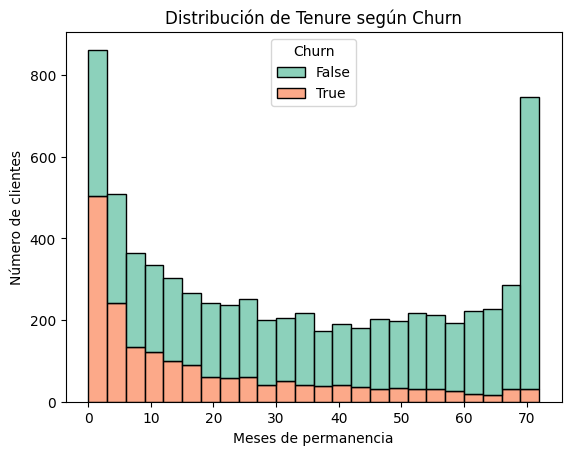

In [35]:
sns.histplot(data=datos, x='tenure', hue='Churn', multiple='stack', bins=24, palette='Set2')
plt.title("Distribución de Tenure según Churn")
plt.xlabel("Meses de permanencia")
plt.ylabel("Número de clientes")
plt.savefig("hist_tenure_churn.png")
plt.show()


Customized Histogram for MonthlyCharges

    - Bins: Use ~20 bins to reflect billing brackets (e.g., $5 or $10 increments)

    - Goal: Are customers with higher/lower charges more likely to churn?



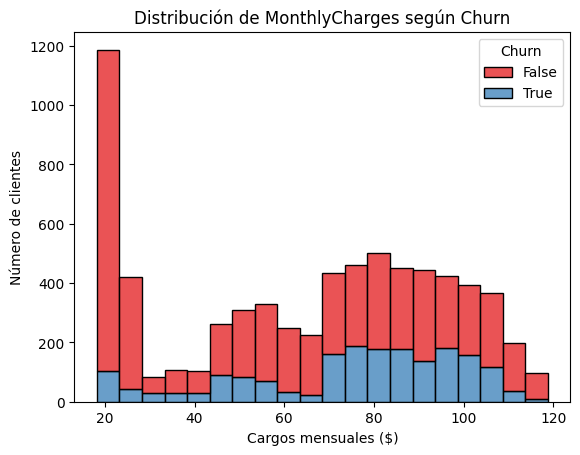

In [36]:
sns.histplot(data=datos, x='MonthlyCharges', hue='Churn', multiple='stack', bins=20, palette='Set1')
plt.title("Distribución de MonthlyCharges según Churn")
plt.xlabel("Cargos mensuales ($)")
plt.ylabel("Número de clientes")
plt.savefig("hist_monthlycharges_churn.png")
plt.show()


Customized Histogram for TotalCharges

    - Bins: Fewer bins (~30) due to wide range

    - Extra: Log scale helps reduce right-skew effect

    - Goal: Is churn higher for lower total lifetime value?

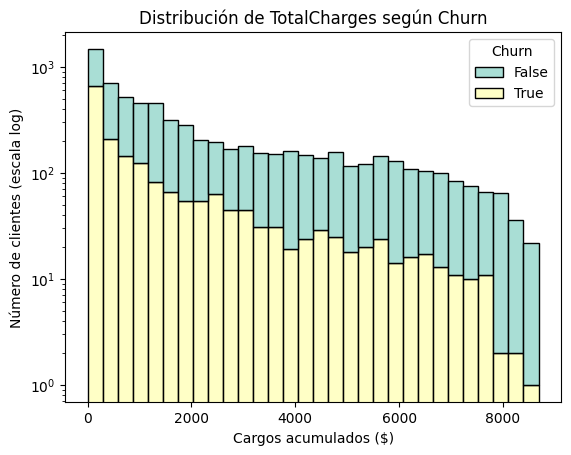

In [37]:
sns.histplot(data=datos, x='TotalCharges', hue='Churn', multiple='stack', bins=30, palette='Set3')
plt.yscale('log')  # Optional: use log scale to see low-frequency zones
plt.title("Distribución de TotalCharges según Churn")
plt.xlabel("Cargos acumulados ($)")
plt.ylabel("Número de clientes (escala log)")
plt.savefig("hist_totalcharges_churn.png")
plt.show()


Boxplot Tenure vs Churn

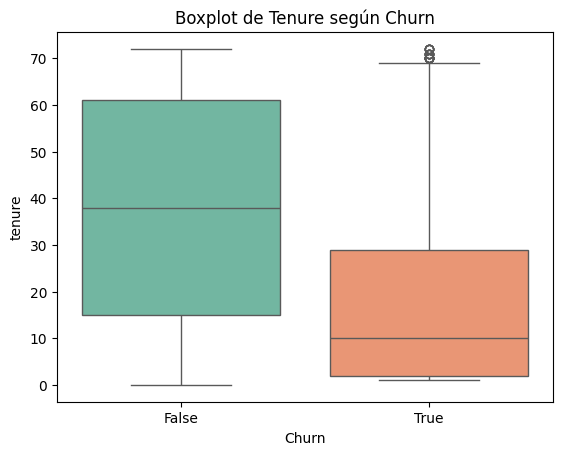

In [38]:
sns.boxplot(data=datos, x='Churn', y='tenure', hue='Churn', palette='Set2', legend=False)
plt.title("Boxplot de Tenure según Churn")
plt.savefig("boxplot_tenure_churn.png")
plt.show()


Boxplot MonthlyCharges vs Churn

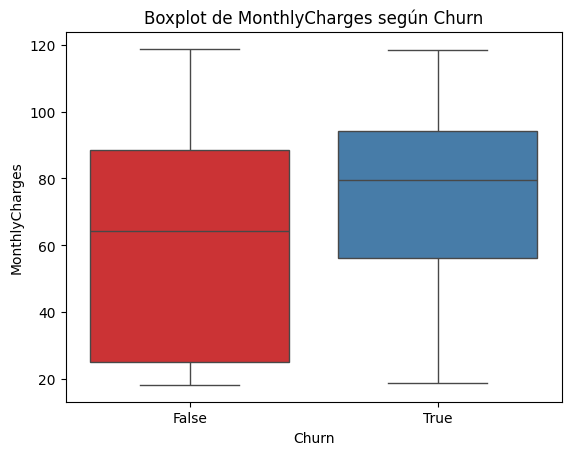

In [39]:
sns.boxplot(data=datos, x='Churn', y='MonthlyCharges', hue='Churn', palette='Set1', legend=False)
plt.title("Boxplot de MonthlyCharges según Churn")
plt.savefig("boxplot_monthlycharges_churn.png")
plt.show()


Boxplot TotalCharges vs Churn

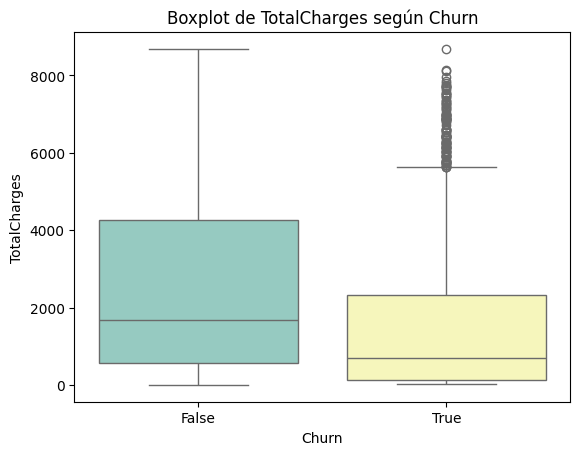

In [41]:
sns.boxplot(data=datos, x='Churn', y='TotalCharges', hue='Churn', palette='Set3', legend=False)
plt.title("Boxplot de TotalCharges según Churn")
plt.savefig("boxplot_totalcharges_churn.png")
plt.show()


Recap Variables Numéricas:

    - tenure mostró una alta concentración de clientes con pocos meses de servicio.

    - Insight: Muchos clientes que cancelan lo hacen temprano.

    - MonthlyCharges presentó una posible relación entre precios altos y mayor churn.

    - Clientes con cargos altos tienden a cancelar más.

    - TotalCharges estuvo altamente sesgado hacia valores bajos.

    - Clientes con poca inversión total tienden a cancelar más.

    - Boxplot Tenure vs Churn: Clientes que cancelan tienen menor permanencia.

    - MonthlyCharges vs Churn: Distribución más amplia en clientes que cancelan.

    - TotalCharges vs Churn: Clientes con mayor gasto tienden a quedarse.

💡 Insights generales hasta ahora:

    La permanencia (tenure) parece ser uno de los factores más fuertes relacionados con la cancelación.

    Clientes con cargos mensuales altos muestran mayor propensión al churn.

    TotalCharges también refleja esto: clientes con historial de gasto bajo son más propensos a cancelar.

    El comportamiento observado respalda la idea de que churn ocurre temprano en el ciclo del cliente, y es más común en segmentos de alto costo y bajo valor acumulado.

🗂️ Archivos guardados hoy:


# PRESENTACIÓN

## ESTRUCTURA DEL PROYECTO

**Carga y Exploración Inicial de Datos**

    - Importar el dataset desde el repositorio.

    - Verificar dimensiones, tipos de datos y valores nulos.

**Fase 0: Análisis Exploratorio Básico (Antes de la Limpieza)**

Objetivo: Realizar un análisis exploratorio para entender las distribuciones, detectar outliers, y obtener estadísticas descriptivas de los datos.

🪜 Pasos:

    Estadísticas descriptivas iniciales
    Obtener resumen de las estadísticas básicas (mean, std, min, max, etc.) para todas las variables numéricas, con especial atención a las variables como MonthlyCharges, TotalCharges, tenure, etc.

    Distribuciones de las variables numéricas
    Graficar distribuciones de las variables numéricas:

        - tenure

        - MonthlyCharges

        - TotalCharges
        
    Buscar outliers y patrones inusuales.

    Boxplots para detectar outliers
    Crear boxplots para identificar valores atípicos en las variables numéricas.

    Distribuciones de variables categóricas
    Graficar la distribución de las variables categóricas:

        - gender, SeniorCitizen, Partner, Dependents, etc.
        - Contar los valores únicos y sus frecuencias.

    Correlación de variables numéricas
    Generar un mapa de calor de correlación para observar qué variables numéricas están más correlacionadas entre sí.

**Fase 1: Preparación de los Datos (Limpieza y Codificación)**

Objetivo: Limpiar y transformar los datos para el análisis y modelado.
🪜 Pasos:

    Eliminar columnas innecesarias

        - Eliminar Cuentas_diarias

        - Eliminar TotalCharges por redundancia

    Conversión de variables categóricas

        - Convertir las variables tipo category en variables dummy (One-Hot Encoding)

    Separar variable objetivo y variables predictoras

        - Separar X (features) y y (target: Churn)

    Normalización de variables numéricas

        - Normalizar tenure y MonthlyCharges con StandardScaler

📁 Resultado:

    DataFrame resultante: datos_v3

    X e y preparados para el modelo

📊 Fase 2: Análisis Exploratorio y Correlación

Objetivo: Comprender el comportamiento de las variables y su relación con la cancelación.


🪜 Pasos:

    Gráfico de correlación numérica
    Generar un mapa de calor para ver la correlación entre las variables numéricas y la variable Churn.

    Distribuciones por Churn
    Graficar distribuciones de variables como MonthlyCharges, tenure, y Contract separadas por Churn.

    Correlación con variable objetivo
    Crear una tabla que muestre la correlación de cada variable con Churn.

🤖 Fase 3: Modelado

Objetivo: Entrenar y comparar al menos dos modelos de clasificación.


🪜 Pasos:

    División de datos
    Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba).

    Entrenamiento de modelos
    Entrenar al menos dos modelos de clasificación:

        - RandomForestClassifier

        - LogisticRegression

📐 Fase 4: Evaluación de Modelos

Objetivo: Evaluar el desempeño de los modelos mediante métricas de clasificación.

🪜 Pasos:

    Evaluación métrica
    Evaluar los modelos utilizando métricas como Accuracy, Precision, Recall, F1, ROC-AUC.

    Gráficos de evaluación
    Crear gráficos de evaluación como:

        - Matrices de confusión para ambos modelos.

        - Curvas ROC para ambos modelos.

🧠 Fase 5: Interpretación y Conclusiones Estratégicas

Objetivo: Identificar las variables clave que impactan en la cancelación de clientes y proponer acciones estratégicas.

🪜 Pasos:

    Importancia de variables
    Visualizar las características más influyentes para la predicción de churn, usando la importancia de las variables en el modelo Random Forest.

    Redacción de insights estratégicos
    Analizar qué variables son más relevantes y qué estrategias se pueden proponer para reducir el churn.

📝 Notas de Control
Versión del DF	Acción Realizada
datos_v1	Eliminado Cuentas_diarias
datos_v2	Eliminado TotalCharges
datos_v3	Datos codificados y normalizados
Nombre del Gráfico	Descripción
heatmap_correlacion	Mapa de calor con correlaciones numéricas
boxplot_monthlycharges_churn	Cargos mensuales vs Churn (boxplot)
hist_tenure_churn	Histograma de tenure según Churn
barras_contract_churn	Barras de tipo de contrato vs Churn
matriz_confusion_rf	Matriz de confusión Random Forest
matriz_confusion_lr	Matriz de confusión Regresión Logística
curva_roc_rf	Curva ROC Random Forest
curva_roc_lr	Curva ROC Regresión Logística
importancia_variables_rf	Importancia de variables (Random Forest)